In [1]:
import numpy as np 
import matplotlib.pyplot as plt


## Least Square Regression 

$$ L=||y-Ax||$$
subject $$ min(L)$$
$$ x=(A^TA)^-1 A^Ty$$

In [2]:
I = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).T
V = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T

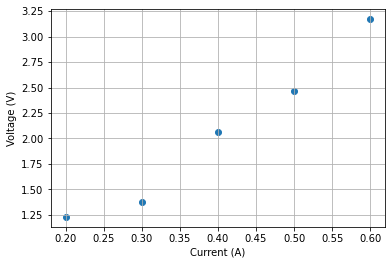

In [3]:
plt.scatter(np.asarray(I), np.asarray(V))

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

In [4]:
y=V
A=I
A=A.reshape(-1,1)
y=y.reshape(-1,1)
R=np.linalg.inv(A.T.dot(A))*A.T.dot(y)
print(R)

[[5.13444444]]


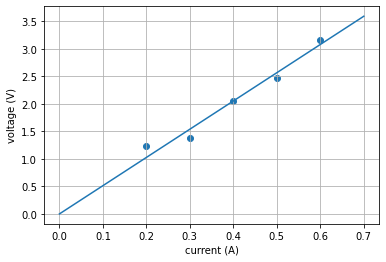

In [5]:
I_line = np.arange(0, 0.8, 0.1)
V_line = R*I_line

plt.scatter(I.flatten(),V.flatten())
plt.plot(I_line, V_line.flatten())
plt.xlabel('current (A)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

## Polymominal fitting

In [6]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
print(z)
slope=z[0]
interset=z[1]

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


In [7]:
x_test=np.array([6.0,7.0,8.0,9])
y1=z[0]*x**3+z[1]*x**2+z[2]*x+z[3]
y2=slope*x_test+interset

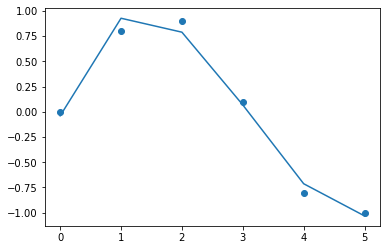

In [8]:
plt.scatter(x,y)
plt.plot(y1)

## Recursive Least Square

In [61]:
I = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).T
V = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T

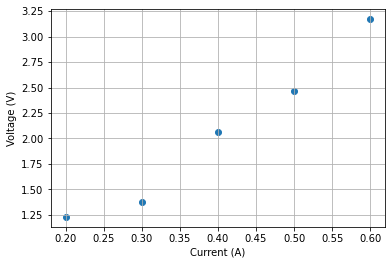

In [62]:
plt.scatter(np.asarray(I), np.asarray(V))

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

In [14]:
y=V
H=I
H=A.reshape(-1,1)
y=y.reshape(-1,1)
R=np.linalg.inv(H.T.dot(A))*H.T.dot(y)
print(R)

[[5.13444444]]


In [40]:
P_k=np.array([[4,10],[0,0.0225]])
x_k=np.array([4,0.0])
it=len(A)
var=0.0225
print(P_k)
print(x_k)

[[ 4.     10.    ]
 [ 0.      0.0225]]
[4. 0.]


Compute Gain 
$$ \mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$

In [41]:
#compute Kk
H_k=np.array([[I[0],1]])
K_k=np.dot(H_k.T,np.linalg.inv((np.dot(H_k,P_k.dot(H_k.T))+var)))
K_k

array([[0.09070295],
       [0.45351474]])

## Update x_k
$$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$

In [44]:
x_k=x_k+np.dot(K_k,(V[0]-np.dot(H_k,x_k)))

In [45]:
x_k

array([4.03900227, 0.19501134])

## Update P_k

$$\mathbf{P}_k = \left(\mathbf{I} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$

In [49]:
P_k=np.dot(np.diag([1,1])-np.dot(K_k,H_k),P_k)
P_k

array([[ 3.92743764,  9.81655329],
       [-0.36281179, -0.89473356]])

## Create loop and do this procedure

For K in number of observation:
$$ \mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$
$$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$
$$\mathbf{P}_k = \left(\mathbf{I} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$

In [70]:
y=V
H=I
H=A.reshape(-1,1)
y=y.reshape(-1,1)
R=np.linalg.inv(H.T.dot(A))*H.T.dot(y)
print(R)

[[5.13444444]]


In [71]:
P_k=np.array([[4,10.0],[0,0.2]])
x_k=np.array([4.0,0.0])
it=H.shape[0]
var=0.0225
x_hist=[]
for k  in range(it) : 
    H_k=np.array([[I[k],1]])
    K_k=np.dot(H_k.T,np.linalg.inv((np.dot(H_k,P_k.dot(H_k.T))+var)))
    x_k=x_k+np.dot(K_k,(V[k]-np.dot(H_k,x_k)))
    P_k=np.dot((np.eye(2,2)-np.dot(K_k,H_k)),P_k)
    print(x_k)
    x_hist.append(x_k)
x_hist=np.array(x_hist)

[4.03609654 0.18048269]
[4.03473746 0.17595244]
[4.0767453  0.28097202]
[4.10599729 0.33947602]
[4.19510897 0.48799547]


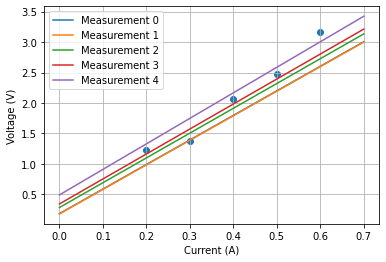

In [83]:
plt.scatter(np.asarray(I), np.asarray(V))
I_line = np.arange(0, 0.8, 0.1)
for i in range(len(x_hist)):
    plt.plot(I_line,x_hist[i,0]*I_line+x_hist[i,1],label='Measurement {}'.format(i))
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()